In [93]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [94]:
import keras

In [95]:
tf.keras.datasets.mnist.load_data(path=r"C:\Users\U1012152\Downloads\mnist.npy")

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [96]:
mnist_files = np.load(r"C:\Users\U1012152\Downloads\mnist.npy")
'''
X_train = mnist_files['x_train'][0:10000]
y_train = mnist_files['y_train'][0:10000]
X_test = mnist_files['x_test'][0:10000]
y_test = mnist_files['y_test'][0:10000]
'''    

X_train = mnist_files['x_train']
y_train = mnist_files['y_train']
X_test = mnist_files['x_test']
y_test = mnist_files['y_test']

In [97]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [98]:
X_train= X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)

In [99]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(60000, 784) (60000, 1) (10000, 784) (10000, 1)


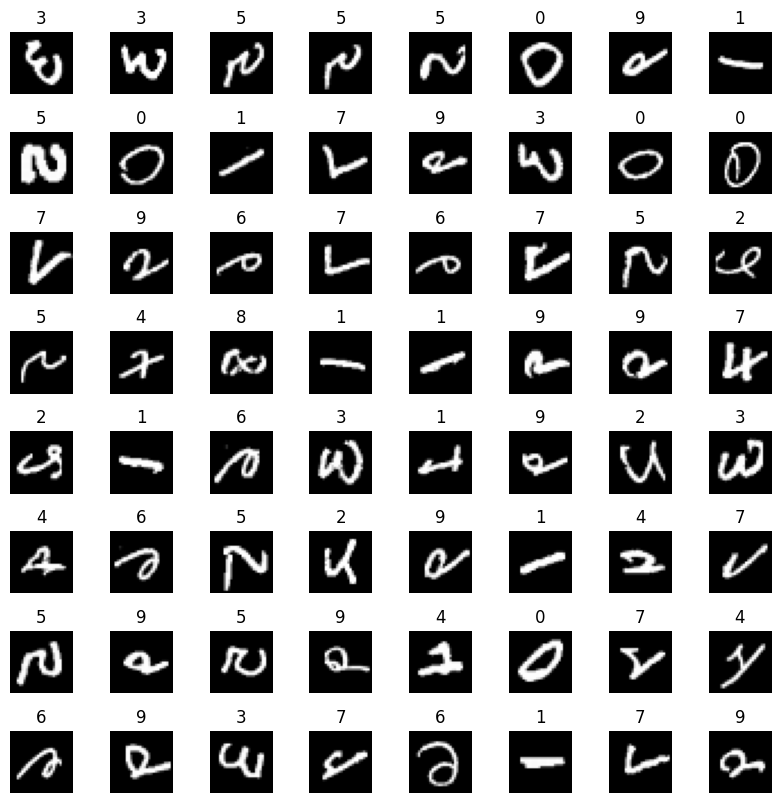

In [100]:
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X_train.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_train[random_index].reshape((28,28)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y_train[random_index,0])
    ax.set_axis_off()

In [101]:
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell
def plot_image(random_index):
    m, n = X_train.shape
    plt.figure(figsize=(3,3))
    X_random_reshaped = X_train[random_index].reshape((28,28)).T

    # Display the image
    plt.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    plt.title(y_train[random_index,0])
    plt.axis('off')




In [119]:
# UNQ_C1
# GRADED CELL: Sequential model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        tf.keras.Input(shape=(784,)),    #specify input size
        ### START CODE HERE ### 
        Dense(50,activation='relu', kernel_regularizer=regularizers.l2(0.01),name="L1"),
        Dense(25,activation='relu', kernel_regularizer=regularizers.l2(0.01),name="L2"),
        Dense(15,activation='relu', kernel_regularizer=regularizers.l2(0.01),name="L3"),
        Dense(10,activation='linear',name="L4")
        
        
        ### END CODE HERE ### 
    ], name = "my_model" 
)       


# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #<-- Note
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)
history = model.fit(
    X_train,y_train,
    epochs=60,callbacks=[es],validation_split=0.3
)





Epoch 1/60
1313/1313 [==============================] - 8s 5ms/step - loss: 2.5866 - categorical_accuracy: 0.0861 - val_loss: 1.7270 - val_categorical_accuracy: 0.1109
Epoch 2/60
1313/1313 [==============================] - 8s 6ms/step - loss: 1.2748 - categorical_accuracy: 0.0959 - val_loss: 0.9229 - val_categorical_accuracy: 0.1004
Epoch 3/60
1313/1313 [==============================] - 6s 4ms/step - loss: 0.7393 - categorical_accuracy: 0.0995 - val_loss: 0.6464 - val_categorical_accuracy: 0.0980
Epoch 4/60
1313/1313 [==============================] - 6s 4ms/step - loss: 0.4903 - categorical_accuracy: 0.0985 - val_loss: 0.4383 - val_categorical_accuracy: 0.0942
Epoch 5/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3959 - categorical_accuracy: 0.0987 - val_loss: 0.3676 - val_categorical_accuracy: 0.0979
Epoch 6/60
1313/1313 [==============================] - 6s 4ms/step - loss: 0.3433 - categorical_accuracy: 0.0981 - val_loss: 0.3333 - val_categorical_accuracy:

In [103]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 50)                39250     
                                                                 
 L2 (Dense)                  (None, 25)                1275      
                                                                 
 L3 (Dense)                  (None, 15)                390       
                                                                 
 L4 (Dense)                  (None, 10)                160       
                                                                 
Total params: 41,075
Trainable params: 41,075
Non-trainable params: 0
_________________________________________________________________


In [104]:
L1_num_params = 784 * 50 + 50  # W1 parameters  + b1 parameters
L2_num_params = 784 * 25 + 25  # W1 parameters  + b1 parameters
L3_num_params = 25 * 15 + 15   # W2 parameters  + b2 parameters
L4_num_params = 15 * 1 + 1     # W3 parameters  + b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params,",  L4 params = ", L4_num_params )

L1 params =  39250 , L2 params =  19625 ,  L3 params =  390 ,  L4 params =  16


In [105]:
[layer1, layer2, layer3, layer4] = model.layers

In [106]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
W4,b4 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 50), b1 shape = (50,)
W2 shape = (50, 25), b2 shape = (25,)
W3 shape = (25, 15), b3 shape = (15,)


In [107]:
print(model.layers[2].weights)

[<tf.Variable 'L3/kernel:0' shape=(25, 15) dtype=float32, numpy=
array([[-7.47052580e-02, -1.00929528e-01, -6.82522357e-02,
         2.12507658e-02, -4.36191708e-02,  2.04873681e-01,
         1.16153285e-01,  4.41749990e-02, -3.82366516e-02,
         3.35296243e-02, -7.25864545e-02,  1.62281498e-01,
        -1.64000299e-02, -5.89093715e-02, -6.89861774e-02],
       [-4.32504267e-02, -4.31777164e-03,  6.75172824e-03,
        -2.82065235e-02,  1.05140749e-02,  1.53369214e-02,
         3.80137488e-02,  5.01772128e-02,  3.57205868e-02,
         6.95199287e-03, -1.08724860e-02, -2.22816737e-03,
        -6.93948288e-03,  2.09142771e-02, -1.84945203e-02],
       [-8.93966854e-02,  5.15436083e-02,  1.32872155e-02,
        -3.02353054e-02,  5.48729040e-02,  1.43449642e-02,
         1.00670774e-02,  5.66037744e-02,  1.17622599e-01,
         1.04124919e-02,  3.61657143e-02, -1.56665873e-02,
         4.49166680e-03, -1.46145970e-02, -1.01348301e-02],
       [ 8.25178996e-03, -8.28157086e-03, -1.33

1/1 [==============================] - 0s 88ms/step
 predicting a five: [[ -1.3014417    3.6100705   -0.13254654   9.184278   -18.612734
   12.070445    -3.4140387   -0.04016465   0.40852785  -1.3195015 ]]
1/1 [==============================] - 0s 26ms/step
 predicting a three:  [[-1.2121551   1.2230545   3.068813    0.82601684 -3.4396234  -2.9445052
  -5.6162534   3.256536    0.46940726 -1.8379269 ]]


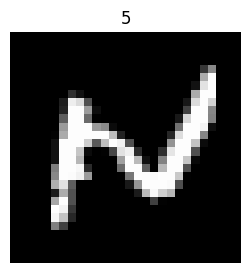

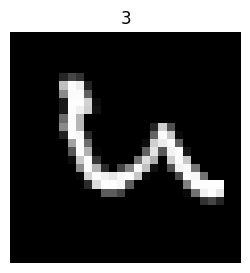

In [108]:
plot_image(0)
prediction = model.predict(X_train[0].reshape(1,784))  # a five
print(f" predicting a five: {prediction}")
plot_image(500)
prediction = model.predict(X_train[500].reshape(1,784))  # a three
print(f" predicting a three:  {prediction}")

1/1 [==============================] - 0s 125ms/step
 predicting a eight: 
[[-1.4041295  -1.3129872  -0.29121432  1.1851716  -5.5028095   0.25965828
  -2.5654397  -2.5723357   4.859111   -1.2917651 ]]
 Largest Prediction index: 8


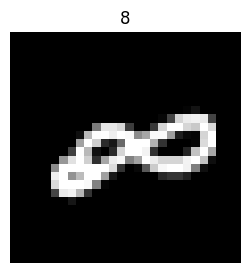

In [109]:
image_of_two = X_train[300]
plot_image(300)

prediction = model.predict(image_of_two.reshape(1,784))  # prediction
print(f" predicting a eight: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

1/1 [==============================] - 0s 114ms/step


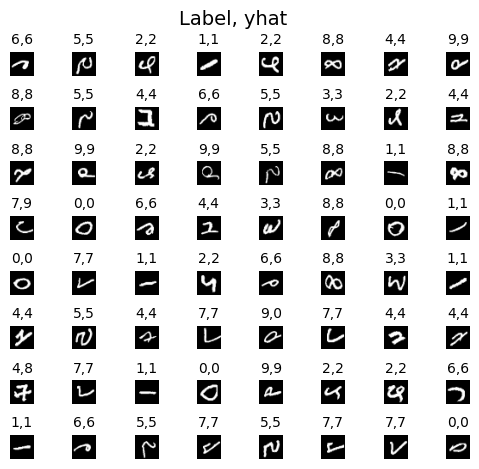

In [110]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X_train.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
#widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_train[random_index].reshape((28,28)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X_train[random_index].reshape(1,784))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y_train[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

In [111]:
model_pred = model.predict(X_test)
yhat = np.argmax(model_pred,axis=1).reshape(10000,1)

313/313 [==============================] - 1s 2ms/step


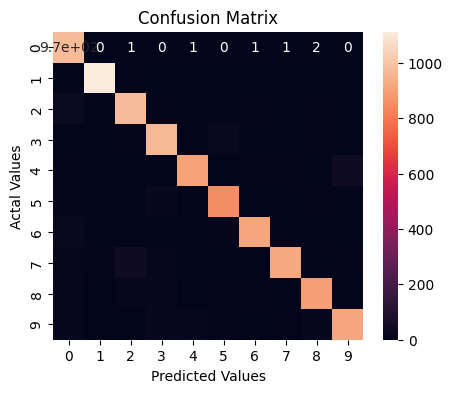

In [112]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import pandas as pd
cm = confusion_matrix(y_test, yhat)
cm_df = pd.DataFrame(cm,
                     index = ['0','1','2','3','4','5','6','7','8','9'], 
                     columns = ['0','1','2','3','4','5','6','7','8','9'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [113]:
cm = confusion_matrix(y_test, yhat)

recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
print("recall - ", recall)
print("precision - ", precision)
#Now the normalize the diagonal entries
cm_accuracy = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
accuracy = cm_accuracy.diagonal()
print("Accuracy ",accuracy )

recall -  [0.99387755 0.98061674 0.94379845 0.95742574 0.92362525 0.9529148
 0.95511482 0.90077821 0.91786448 0.90683845]
precision -  [0.8870674  0.98234775 0.92234848 0.91485336 0.9721329  0.93304061
 0.96723044 0.97989418 0.94303797 0.94039054]
Accuracy  [0.99387755 0.98061674 0.94379845 0.95742574 0.92362525 0.9529148
 0.95511482 0.90077821 0.91786448 0.90683845]


In [114]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_test, yhat)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.8870674  0.98234775 0.92234848 0.91485336 0.9721329  0.93304061
 0.96723044 0.97989418 0.94303797 0.94039054]
recall: [0.99387755 0.98061674 0.94379845 0.95742574 0.92362525 0.9529148
 0.95511482 0.90077821 0.91786448 0.90683845]
fscore: [0.93743985 0.98148148 0.93295019 0.93565554 0.94725849 0.94287299
 0.96113445 0.93867207 0.93028096 0.92330979]
support: [ 980 1135 1032 1010  982  892  958 1028  974 1009]


In [115]:
#classification report

report = classification_report(y_test,yhat, output_dict=True)

df = pd.DataFrame(report).transpose()

df

,precision,recall,f1-score,support
0,0.887067,0.993878,0.937440,980.0000
1,0.982348,0.980617,0.981481,1135.0000
2,0.922348,0.943798,0.932950,1032.0000
3,0.914853,0.957426,0.935656,1010.0000
4,0.972133,0.923625,0.947258,982.0000
5,0.933041,0.952915,0.942873,892.0000
6,0.967230,0.955115,0.961134,958.0000
7,0.979894,0.900778,0.938672,1028.0000
8,0.943038,0.917864,0.930281,974.0000
9,0.940391,0.906838,0.923310,1009.0000


In [116]:
#over all precision recall accuracy
print("Overall Precision",np.mean(precision))
print("Overall Recall ",np.mean(recall))
print("Overall fscore ", np.mean(fscore))
print("Overall accuracy ", np.mean(accuracy))


Overall Precision 0.9442343650589955
Overall Recall  0.9432854499048446
Overall fscore  0.9431055805784714
Overall accuracy  0.9432854499048446


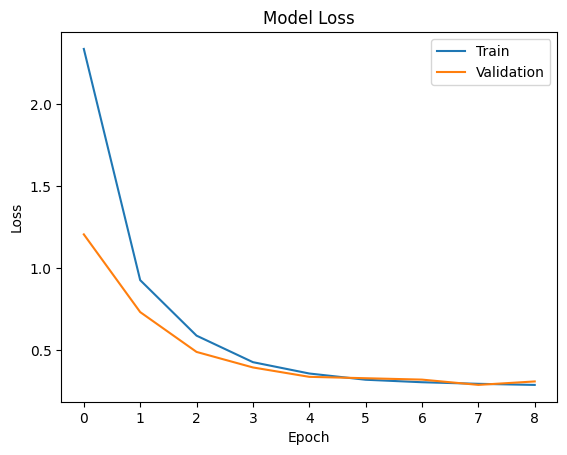

In [117]:
#Training loss
history.history['loss']
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(loc='upper right')